<a href="https://colab.research.google.com/github/YamilaTaschuk/TrabajoPractico/blob/main/LABINTEGRADOR2TASCHUK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las biblotecas

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Paso 2: Subimos la imagen, la leemos y mostramos la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio

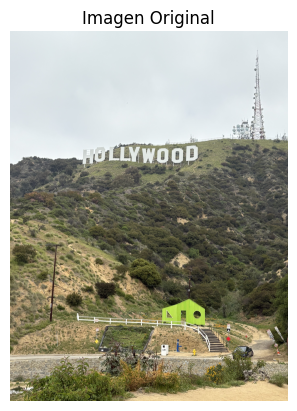

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen que ya está subida en /content/sample_data/
ruta_imagen = '/content/sample_data/la.jpeg'

# Leer la imagen usando OpenCV
imagen_bgr = cv2.imread(ruta_imagen)

# Verificar si la imagen fue leída correctamente
if imagen_bgr is None:
    print("❌ Error: No se pudo leer la imagen. Verifica la ruta y el formato del archivo.")
else:
    # Convertir la imagen de BGR a RGB para visualizarla correctamente
    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen usando Matplotlib
    plt.imshow(imagen_rgb)
    plt.title("Imagen Original")
    plt.axis('off')  # Ocultar los ejes
    plt.show()


Paso 3: Ajustamos el brillo y el contraste. Ecualización de histograma

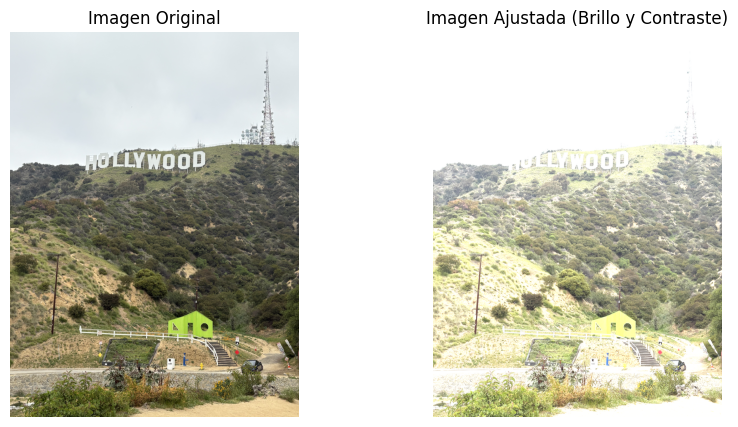

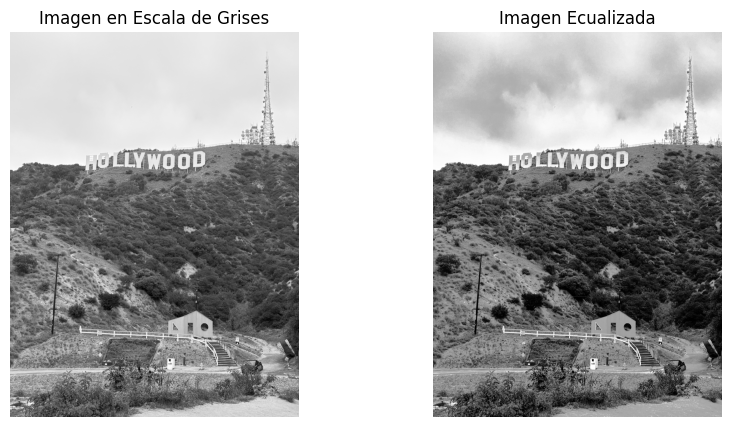

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar el brillo y el contraste
def ajustar_brilho_contraste(imagen, alpha=1.0, beta=0):
    """
    Ajusta el brillo y el contraste de la imagen.

    :param imagen: Imagen a modificar (en formato BGR).
    :param alpha: Factor de contraste. 1.0 significa sin cambio.
    :param beta: Factor de brillo. 0 significa sin cambio.
    :return: Imagen ajustada.
    """
    return cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)

# Ruta de la imagen
ruta_imagen = '/content/sample_data/la.jpeg'

# Leemos la imagen usando OpenCV
imagen_bgr = cv2.imread(ruta_imagen)

# Verificamos si la imagen fue leída correctamente
if imagen_bgr is None:
    print("❌ Error: No se pudo leer la imagen.")
else:
    # Convertir la imagen de BGR a RGB para mostrarla
    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

    # Mostramos la imagen original
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title("Imagen Original")
    plt.axis('off')

    # Aplicamos ajuste de brillo y contraste
    imagen_ajustada = ajustar_brilho_contraste(imagen_bgr, alpha=1.5, beta=50)

    # Convertimos a RGB para mostrarla
    imagen_ajustada_rgb = cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB)

    # Mostramos la imagen ajustada
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_ajustada_rgb)
    plt.title("Imagen Ajustada (Brillo y Contraste)")
    plt.axis('off')

    plt.show()

    # Ecualización de histograma (solo en la imagen en escala de grises)
    imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
    imagen_ecualizada = cv2.equalizeHist(imagen_gris)

    # Mostramos la imagen ecualizada
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title("Imagen en Escala de Grises")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(imagen_ecualizada, cmap='gray')
    plt.title("Imagen Ecualizada")
    plt.axis('off')

    plt.show()


Paso 4: Convertimos a HSV, Definimos el rango de color, Creamos y aplicamos una mascara


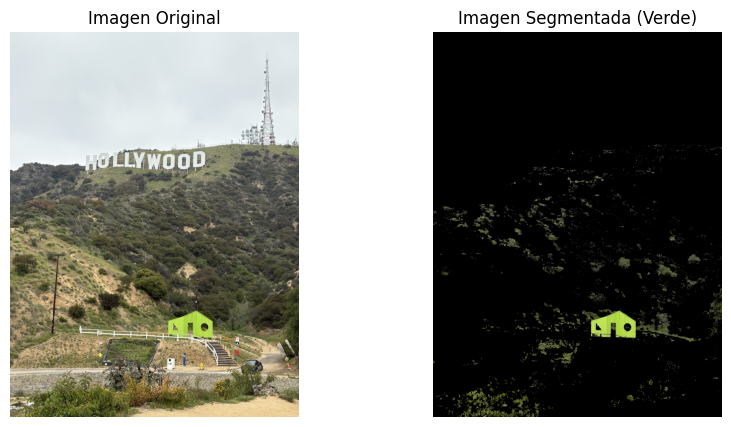

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/sample_data/la.jpeg'

# Leer la imagen
imagen_bgr = cv2.imread(ruta_imagen)

# Verificar si la imagen fue leída correctamente
if imagen_bgr is None:
    print("❌ Error: No se pudo leer la imagen.")
else:
    # Convertir la imagen de BGR a RGB para mostrarla correctamente
    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

    # Mostramos la imagen original
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title("Imagen Original")
    plt.axis('off')

    # Convertimos la imagen de BGR a HSV
    imagen_hsv = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2HSV)

    # Utilizamos el color verda para segmentar la imagen
    # El verde en el espacio HSV tiene un rango de H entre 35 y 85
    rango_bajo = np.array([35, 50, 50])  # H min, S min, V min
    rango_alto = np.array([85, 255, 255])  # H max, S max, V max

    # Creamos la máscara
    mascara = cv2.inRange(imagen_hsv, rango_bajo, rango_alto)

    # Aplicamos la máscara a la imagen original usando bitwise_and
    resultado = cv2.bitwise_and(imagen_bgr, imagen_bgr, mask=mascara)

    # Convertimos el resultado a RGB para mostrarlo
    resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

    # Mostramos  la imagen original y la segmentada por color verde
    plt.subplot(1, 2, 2)
    plt.imshow(resultado_rgb)
    plt.title("Imagen Segmentada (Verde)")
    plt.axis('off')

    plt.show()


Paso 5: Dibujamos rectangulos y agregamos texto

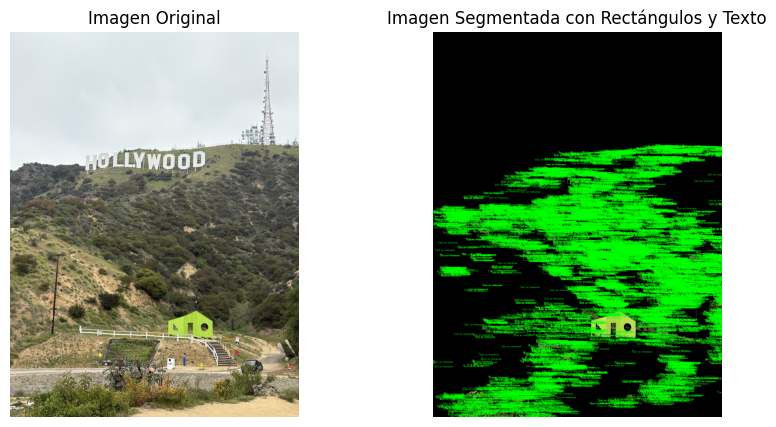

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/sample_data/la.jpeg'  # Ajusta la ruta según tu imagen

# Leer la imagen
imagen_bgr = cv2.imread(ruta_imagen)

# Verificar si la imagen fue leída correctamente
if imagen_bgr is None:
    print("❌ Error: No se pudo leer la imagen.")
else:
    # Convertimos la imagen de BGR a HSV
    imagen_hsv = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2HSV)

    # Definimos el rango de color para el verde (ajustar según el color que quieras segmentar)
    rango_bajo = np.array([35, 50, 50])  # H min, S min, V min
    rango_alto = np.array([85, 255, 255])  # H max, S max, V max

    # Creamos la máscara
    mascara = cv2.inRange(imagen_hsv, rango_bajo, rango_alto)

    # Aplicamos la máscara a la imagen original usando bitwise_and
    resultado = cv2.bitwise_and(imagen_bgr, imagen_bgr, mask=mascara)

    # Encontramos los contornos en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujamos rectángulos y agregar el texto "Esto es Hollywood" en los objetos segmentados
    for contorno in contornos:
        # Obtener el rectángulo delimitador de cada contorno
        x, y, w, h = cv2.boundingRect(contorno)

        # Dibujamos un rectángulo alrededor del objeto
        cv2.rectangle(resultado, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Rectángulo verde

        # Agregamos el texto "Esto es Hollywood" sobre el rectángulo
        cv2.putText(resultado, 'Esto es Hollywood', (x + 10, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convertimos la imagen resultante a RGB para mostrarla
    resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

    # Mostramos la imagen original y la segmentada con rectángulos y texto
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(resultado_rgb)
    plt.title("Imagen Segmentada con Rectángulos y Texto")
    plt.axis('off')

    plt.show()


Conclusion: Este proceso nos permite identificar objetos de un color específico —en este caso, el color verde— dentro de una imagen, y agregar información visual como rectángulos y texto para resaltar dichos objetos. Esta técnica es especialmente útil en tareas de detección de objetos basadas en color. Aunque en este caso no se logró visualizar claramente el rectángulo ni el texto en el resultado final, esto se debió a las características de la imagen utilizada, como el contraste o el brillo del fondo. Ajustando los rangos de color en el espacio HSV, el grosor y color del rectángulo, así como el tamaño y color del texto, es posible obtener una mejor visualización y resultados más precisos en futuras pruebas.


